In [ ]:

import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("winemag-data_first150k.csv")

In [ ]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0', 'country', 'designation',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],axis = 1)

In [ ]:
df

,description,points
0,This tremendous 100% varietal wine hails from ...,96
1,"Ripe aromas of fig, blackberry and cassis are ...",96
2,Mac Watson honors the memory of a wine once ma...,96
3,"This spent 20 months in 30% new French oak, an...",96
4,"This is the top wine from La Bégude, named aft...",95
...,...,...
150925,Many people feel Fiano represents southern Ita...,91
150926,"Offers an intriguing nose with ginger, lime an...",91
150927,This classic example comes from a cru vineyard...,91
150928,"A perfect salmon shade, with scents of peaches...",90


In [ ]:
df.points.value_counts()

,count
points,
87,20747
88,17871
90,15973
86,15573
89,12921
85,12411
84,10708
91,10536
92,9241


In [ ]:
def sentiment_rating(rating):

    if(int(rating) < 90):
        return 0
    else:
        return 1
df.points = df.points.apply(sentiment_rating)

In [ ]:
df

,description,points
0,This tremendous 100% varietal wine hails from ...,1
1,"Ripe aromas of fig, blackberry and cassis are ...",1
2,Mac Watson honors the memory of a wine once ma...,1
3,"This spent 20 months in 30% new French oak, an...",1
4,"This is the top wine from La Bégude, named aft...",1
...,...,...
150925,Many people feel Fiano represents southern Ita...,1
150926,"Offers an intriguing nose with ginger, lime an...",1
150927,This classic example comes from a cru vineyard...,1
150928,"A perfect salmon shade, with scents of peaches...",1


In [ ]:
df.points.value_counts()

,count
points,
0,102720
1,48210


In [ ]:
df.columns = ['Review','Liked']

In [ ]:
df.head()

,Review,Liked
0,This tremendous 100% varietal wine hails from ...,1
1,"Ripe aromas of fig, blackberry and cassis are ...",1
2,Mac Watson honors the memory of a wine once ma...,1
3,"This spent 20 months in 30% new French oak, an...",1
4,"This is the top wine from La Bégude, named aft...",1


In [ ]:
X=df.Review.astype('str')
y=df.Liked

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
vocab=1000
tokenizer= tf.keras.preprocessing.text.Tokenizer(num_words=vocab, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)
padded_train=pad_sequences(train_sequence,maxlen=500)
padded_test=pad_sequences(test_sequence,maxlen=500)

In [ ]:
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
LSTM =  tf.keras.layers.LSTM
Embedding =  tf.keras.layers.Embedding
GlobalAveragePooling1D =  tf.keras.layers.GlobalAveragePooling1D
Adam = tf.keras.optimizers.Adam

In [ ]:
model=Sequential()
model.add(Embedding(vocab,1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(padded_train,y_train,validation_data=(padded_test,y_test),epochs=10)

Epoch 1/10
3774/3774 ━━━━━━━━━━━━━━━━━━━━ 666s 176ms/step - accuracy: 0.7149 - loss: 0.5654 - val_accuracy: 0.8153 - val_loss: 0.3990
Epoch 2/10
3774/3774 ━━━━━━━━━━━━━━━━━━━━ 665s 172ms/step - accuracy: 0.8018 - loss: 0.4211 - val_accuracy: 0.7388 - val_loss: 0.4976
Epoch 3/10
3774/3774 ━━━━━━━━━━━━━━━━━━━━ 690s 174ms/step - accuracy: 0.8140 - loss: 0.3987 - val_accuracy: 0.7944 - val_loss: 0.4337
Epoch 4/10
3774/3774 ━━━━━━━━━━━━━━━━━━━━ 684s 174ms/step - accuracy: 0.8211 - loss: 0.3846 - val_accuracy: 0.8360 - val_loss: 0.3565
Epoch 5/10
3774/3774 ━━━━━━━━━━━━━━━━━━━━ 693s 177ms/step - accuracy: 0.8247 - loss: 0.3777 - val_accuracy: 0.8342 - val_loss: 0.3612
Epoch 6/10
3774/3774 ━━━━━━━━━━━━━━━━━━━━ 682s 178ms/step - accuracy: 0.8220 - loss: 0.3828 - val_accuracy: 0.8327 - val_loss: 0.3700
Epoch 7/10
3774/3774 ━━━━━━━━━━━━━━━━━━━━ 710s 185ms/step - accuracy: 0.8298 - loss: 0.3700 - val_accuracy: 0.7772 - val_loss: 0.4501
Epoch 8/10
3774/3774 ━━━━━━━━━━━━━━━━━━━━ 713s 178ms/step - ac

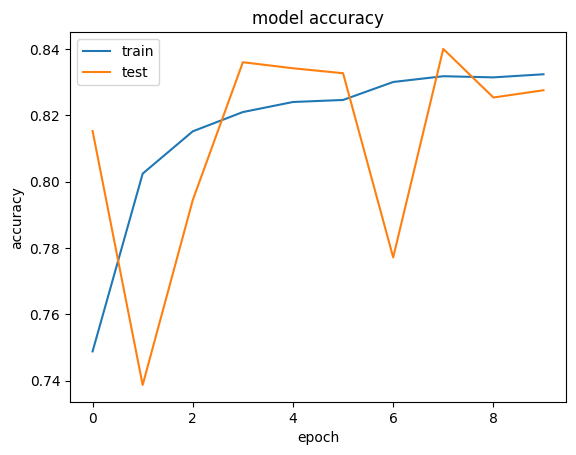

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def predict_sentiment(model, tokenizer, review_text, max_length=500):
    # Preprocess the new text
    sequences = tokenizer.texts_to_sequences([review_text])
    padded = pad_sequences(sequences, maxlen=max_length)

    # Make prediction
    prediction = model.predict(padded)[0][0]

    return prediction

In [ ]:
example_reviews = [
        "An excellent wine with great balance and complexity. Rich flavors of dark fruit and oak.",
        "Simple and straightforward. Somewhat bland with little character.",
        "Amazing depth with perfect tannins. A masterpiece of winemaking."
    ]

print("\nExample Predictions:")
for review in example_reviews:
  prediction = predict_sentiment(model, tokenizer, review)
  print(f"\nReview: {review}")
  print(f"Prediction Score: {prediction:.3f}")
  print(f"Sentiment: {'Liked' if prediction > 0.5 else 'Not Liked'}")


Example Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

Review: An excellent wine with great balance and complexity. Rich flavors of dark fruit and oak.
Prediction Score: 0.176
Sentiment: Not Liked
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Review: Simple and straightforward. Somewhat bland with little character.
Prediction Score: 0.000
Sentiment: Not Liked
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Review: Amazing depth with perfect tannins. A masterpiece of winemaking.
Prediction Score: 0.021
Sentiment: Not Liked


In [ ]:
#########Random Forest Classifier

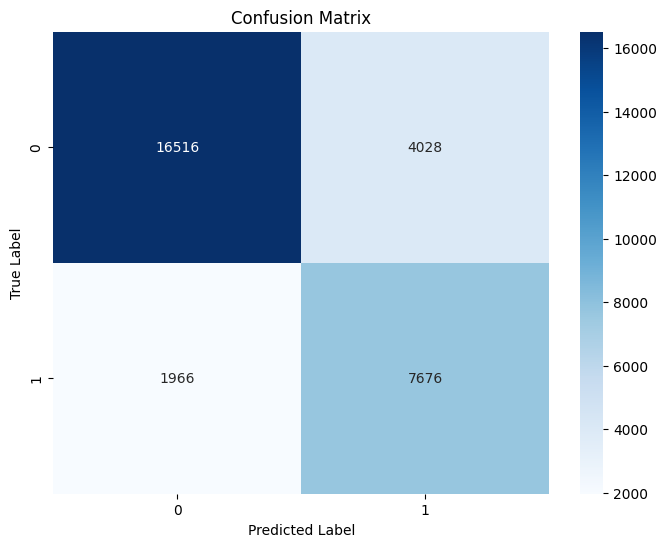


Model Performance:
Accuracy: 0.8014
Precision: 0.6558
Recall: 0.7961
F1_score: 0.7192


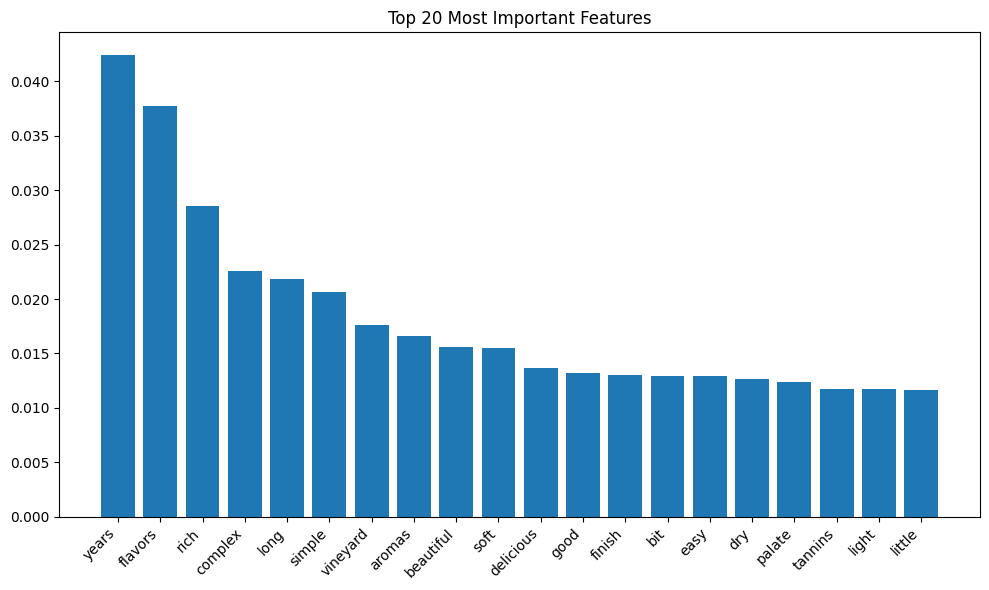


Example Predictions:

Review: An excellent wine with great balance and complexity. Rich flavors of dark fruit and oak.
Prediction: Liked
Confidence: 0.540

Review: Simple and straightforward. Somewhat bland with little character.
Prediction: Not Liked
Confidence: 0.292

Review: Amazing depth with perfect tannins. A masterpiece of winemaking.
Prediction: Not Liked
Confidence: 0.479


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

class WineReviewClassifier:
    def __init__(self, vocab_size=5000, max_features=5000):

        self.vectorizer = TfidfVectorizer(
            max_features=max_features,
            stop_words='english',
            ngram_range=(1, 2)
        )
        self.classifier = RandomForestClassifier(
            n_estimators=300,
            max_depth=20,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42,
            class_weight='balanced'
        )
        self.le = LabelEncoder()

    def prepare_data(self, file_path):

        df = pd.read_csv(file_path)

        df = df[['description', 'points']]

        df['sentiment'] = df['points'].apply(lambda x: 1 if x >= 90 else 0)

        X = df['description'].astype(str)
        y = df['sentiment']

        return X, y

    def train(self, X_train, y_train):

        y_train = self.le.fit_transform(y_train)

        X_train_vectorized = self.vectorizer.fit_transform(X_train)

        self.classifier.fit(X_train_vectorized, y_train)

    def evaluate(self, X_test, y_test):

        y_test = self.le.transform(y_test)

        X_test_vectorized = self.vectorizer.transform(X_test)


        y_pred = self.classifier.predict(X_test_vectorized)

        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary'
        )

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    def feature_importance(self):

        feature_names = self.vectorizer.get_feature_names_out()

        importances = self.classifier.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title("Top 20 Most Important Features")
        plt.bar(range(20), importances[indices[:20]])
        plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def predict(self, review_text):

        review_vectorized = self.vectorizer.transform([review_text])

        prediction = self.classifier.predict(review_vectorized)
        probability = self.classifier.predict_proba(review_vectorized)[0][1]

        return prediction[0], probability

def main():
    classifier = WineReviewClassifier()

    file_path = "winemag-data_first150k.csv"
    X, y = classifier.prepare_data(file_path)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    classifier.train(X_train, y_train)

    metrics = classifier.evaluate(X_test, y_test)
    print("\nModel Performance:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    classifier.feature_importance()

    example_reviews = [
        "An excellent wine with great balance and complexity. Rich flavors of dark fruit and oak.",
        "Simple and straightforward. Somewhat bland with little character.",
        "Amazing depth with perfect tannins. A masterpiece of winemaking."
    ]

    print("\nExample Predictions:")
    for review in example_reviews:
        prediction, probability = classifier.predict(review)
        print(f"\nReview: {review}")
        print(f"Prediction: {'Liked' if prediction == 1 else 'Not Liked'}")
        print(f"Confidence: {probability:.3f}")

    joblib.dump(classifier.classifier, 'wine_review_rf_model.joblib')
    joblib.dump(classifier.vectorizer, 'wine_review_vectorizer.joblib')

if __name__ == "__main__":
    main()

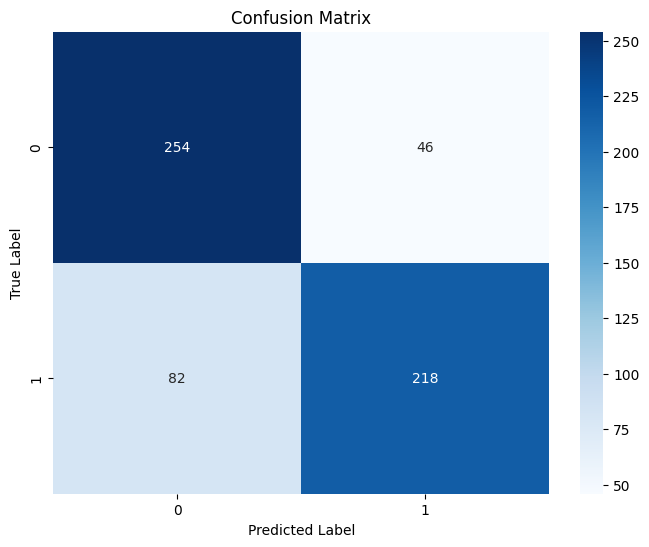


Model Performance:
Accuracy: 0.7867
Precision: 0.8258
Recall: 0.7267
F1_score: 0.7730


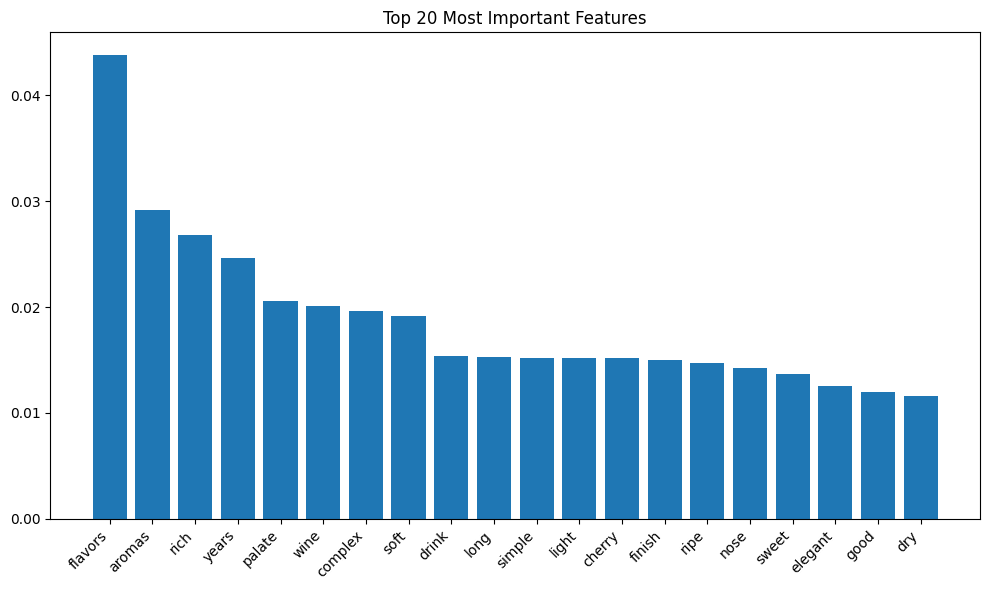


Example Predictions:

Review: An excellent wine with great balance and complexity. Rich flavors of dark fruit and oak.
Prediction: Liked
Confidence: 0.563

Review: Simple and straightforward. Somewhat bland with little character.
Prediction: Not Liked
Confidence: 0.347

Review: Amazing depth with perfect tannins. A masterpiece of winemaking.
Prediction: Not Liked
Confidence: 0.496


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

class WineReviewClassifier:
    def __init__(self, vocab_size=5000, max_features=5000):

        self.vectorizer = TfidfVectorizer(
            max_features=max_features,
            stop_words='english',
            ngram_range=(1, 2)
        )
        self.classifier = RandomForestClassifier(
            n_estimators=300,
            max_depth=20,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42,
            class_weight='balanced'
        )
        self.le = LabelEncoder()

    def prepare_data(self, file_path):

        df = pd.read_csv(file_path)

        df = df[['description', 'points']]

        df['sentiment'] = df['points'].apply(lambda x: 1 if x >= 90 else 0)

        X = df['description'].astype(str)
        y = df['sentiment']

        return X, y

    def train(self, X_train, y_train):

        y_train = self.le.fit_transform(y_train)

        X_train_vectorized = self.vectorizer.fit_transform(X_train)

        self.classifier.fit(X_train_vectorized, y_train)

    def evaluate(self, X_test, y_test):

        y_test = self.le.transform(y_test)

        X_test_vectorized = self.vectorizer.transform(X_test)

        y_pred = self.classifier.predict(X_test_vectorized)

        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary'
        )

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    def feature_importance(self):

        feature_names = self.vectorizer.get_feature_names_out()

        importances = self.classifier.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title("Top 20 Most Important Features")
        plt.bar(range(20), importances[indices[:20]])
        plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def predict(self, review_text):

        review_vectorized = self.vectorizer.transform([review_text])

        prediction = self.classifier.predict(review_vectorized)
        probability = self.classifier.predict_proba(review_vectorized)[0][1]

        return prediction[0], probability

def main():
    classifier = WineReviewClassifier()

    file_path = "wine_small_balanced.csv"
    X, y = classifier.prepare_data(file_path)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    classifier.train(X_train, y_train)

    metrics = classifier.evaluate(X_test, y_test)
    print("\nModel Performance:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    classifier.feature_importance()

    example_reviews = [
        "An excellent wine with great balance and complexity. Rich flavors of dark fruit and oak.",
        "Simple and straightforward. Somewhat bland with little character.",
        "Amazing depth with perfect tannins. A masterpiece of winemaking."
    ]

    print("\nExample Predictions:")
    for review in example_reviews:
        prediction, probability = classifier.predict(review)
        print(f"\nReview: {review}")
        print(f"Prediction: {'Liked' if prediction == 1 else 'Not Liked'}")
        print(f"Confidence: {probability:.3f}")


    joblib.dump(classifier.classifier, 'wine_review_rf_model.joblib')
    joblib.dump(classifier.vectorizer, 'wine_review_vectorizer.joblib')

if __name__ == "__main__":
    main()

In [ ]:
########SMOTE#############

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline

class AdvancedWineReviewClassifier:
    def __init__(self, vocab_size=5000, max_features=5000):

        self.vectorizer = TfidfVectorizer(
            max_features=max_features,
            stop_words='english',
            ngram_range=(1, 2)
        )

        rf_classifier = RandomForestClassifier(
            n_estimators=300,
            max_depth=20,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42,
            class_weight='balanced'
        )

        lr_classifier = LogisticRegression(
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )

        svm_classifier = SVC(
            kernel='rbf',
            probability=True,
            class_weight='balanced',
            random_state=42
        )

        self.classifier = VotingClassifier(
            estimators=[
                ('rf', rf_classifier),
                ('lr', lr_classifier),
                ('svm', svm_classifier)
            ],
            voting='soft'
        )

        self.smote = SMOTE(random_state=42)

        self.le = LabelEncoder()

    def prepare_data(self, file_path):

        df = pd.read_csv(file_path)

        df = df[['description', 'points']]

        df['sentiment'] = df['points'].apply(lambda x: 1 if x >= 90 else 0)

        X = df['description'].astype(str)
        y = df['sentiment']

        return X, y

    def create_pipeline(self):
        """
        Create a machine learning pipeline with SMOTE

        Returns:
        --------
        Pipeline : Scikit-learn compatible pipeline
        """
        pipeline = ImbPipeline([
            ('tfidf', self.vectorizer),
            ('smote', self.smote),
            ('classifier', self.classifier)
        ])

        return pipeline

    def train(self, X_train, y_train):
        """
        Train the wine review classifier

        Parameters:
        -----------
        X_train : array-like
            Training text reviews
        y_train : array-like
            Training sentiment labels
        """
        y_train = self.le.fit_transform(y_train)

        pipeline = self.create_pipeline()

        pipeline.fit(X_train, y_train)

        self.pipeline = pipeline

    def evaluate(self, X_test, y_test):

        y_test = self.le.transform(y_test)

        y_pred = self.pipeline.predict(X_test)
        y_pred_proba = self.pipeline.predict_proba(X_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary'
        )
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        }

    def predict(self, review_text):

        prediction = self.pipeline.predict([review_text])[0]
        probability = self.pipeline.predict_proba([review_text])[0][1]

        return prediction, probability

def main():
    classifier = AdvancedWineReviewClassifier()

    file_path = "winemag-data_first150k.csv"
    X, y = classifier.prepare_data(file_path)

    print("Class Distribution (Before SMOTE):")
    print(pd.Series(y).value_counts(normalize=True))

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    classifier.train(X_train, y_train)

    metrics = classifier.evaluate(X_test, y_test)
    print("\nModel Performance:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    example_reviews = [
        "An excellent wine with great balance and complexity. Rich flavors of dark fruit and oak.",
        "Simple and straightforward. Somewhat bland with little character.",
        "Amazing depth with perfect tannins. A masterpiece of winemaking."
    ]

    print("\nExample Predictions:")
    for review in example_reviews:
        prediction, probability = classifier.predict(review)
        print(f"\nReview: {review}")
        print(f"Prediction: {'Liked' if prediction == 1 else 'Not Liked'}")
        print(f"Confidence: {probability:.3f}")

    joblib.dump(classifier.pipeline, 'wine_review_smote_model.joblib')

if __name__ == "__main__":
    main()

Class Distribution (Before SMOTE):
sentiment
0    0.68058
1    0.31942
Name: proportion, dtype: float64
